## Important Corrections
1. The performance measure is **mean squared error**.
2. The bias term was added to the bottom exercise.
3. A completed version of the Linear Regression exercise was added.


# ACM Research Week 2: Linear Regression

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ACM-Research/image-classification-cnn/blob/master/week2/LinearRegression_Complete.ipynb)


## Background
### Dot Product
Assume we have two vectors $\vec{v} = (v_1, v_2, ..., v_n)$ and $\vec{w} = (w_1, w_2, ..., w_n)$.

The *dot product* is defined as the sum of the product of corresponding components:

$$\vec{v}\cdot\vec{w} = v_1 w_1 + v_2 w_2 + ... + v_n w_n$$

In [1]:
import numpy as np
v = np.array([1, 2])
w = np.array([3, 4])
np.dot(v, w)

11

### Matrix Multiplication
Let's say have two matrices $A$ and $B$ as defined below:

$$
A = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix},\:\:
B = \begin{bmatrix} 7 & 8 \\ 9 & 10 \\ 11 & 12 \end{bmatrix}
$$

The *product* $AB$ of two matrices is defined as the dot product between the rows of $A$ with the columns of $B$:

$$AB = \begin{bmatrix}
1(7) + 2(9) + 3(11) & 1(8) + 2(10) + 3(12) \\
4(7) + 5(9) + 6(11) & 4(8) + 5(10) + 6(12)
\end{bmatrix} = \begin{bmatrix}58 & 64 \\ 139 & 154\end{bmatrix}$$

Note than if $A$ is of $a \times b$ and $B$ is of $b \times c$, then $AB$ is of size $a \times c$. 

The product also doesn't exist if the number of rows in A doesn't match the number of columns in C.

In [2]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8], [9, 10], [11, 12]])
np.dot(A, B)

array([[ 58,  64],
       [139, 154]])

### Transpose a Matrix
Rows <-> columns. That's it.

In [3]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

## Main Content

### Intro

**Linear regression** is one of the most basic machine learning tasks: fit a linear model to some data.

You might have seen a line in 2D as $y=mx+b$, where $m$ is the slope and $b$ is the y-intercept.

Let's first *vectorize*, this, i.e. think of it within the realm of matrix multiplication. Instead of writing our line as $y=mx+b$, we can rewrite the right side of that equation as $y = w^{\top}x$, where $x_0 = 1$ and $w$ is a $1\times 2$ vector.

As an example, how would we write the equation $y=3x+4$ in this form?
Well, $w = \begin{bmatrix} 4 \\ 3 \end{bmatrix}$, and $x = \begin{bmatrix} 1 \\ x_1 \end{bmatrix}$, where $x_1$ takes the place of $x$ in the slope-intercept form equation. We can verify this is the same by multiplying it out:

$$
\begin{align}
y &= w^{\top} x \\
y &= \begin{bmatrix} 4 & 3 \end{bmatrix} \begin{bmatrix} 1 \\ x_1 \end{bmatrix} \\
y &= 4 + 3x_1 \;\checkmark
\end{align}
$$

In [4]:
def equation(x1):
  w = np.array([[4], [3]])
  x = np.array([[1], [x1]])
  return np.dot(w.T, x)
print(equation(1).flatten())
print(equation(4).flatten())

[7]
[16]


### Multivariate Linear Equations: Vectorized
Now, let's extend this concept to multiple dimensions and multiple points.
Let's say we had the equation $y = w_0x_0 +w_1 x_1 + w_2 x_2 + ... + w_n x_n$. This is a line in $n$ dimensions—for us, we'll say this model takes $n$ *features*. How would we vectorize this, and use it for multiple points?

Let's say we have the **design matrix**:
$$
X = \begin{bmatrix}
1 & 0.315 & 0.083 & 0.849 \\
1 & 0.522 & 0.079 & 0.530 \\
1 & 0.558 & 0.252 & 0.958 \\
1 & 0.134 & 0.241 & 0.473
\end{bmatrix}
$$

Here, we have 3 *features* and 4 *data points*/*training examples*. We can also say $n=3$ and $m=4$.

Let's say we also have a vector of *weights*:

$$ w = 
\begin{bmatrix}
w_0 \\
w_1 \\
w_2 \\
w_3
\end{bmatrix}
=
\begin{bmatrix}
0.012 \\
0.951 \\
0.301 \\
0.868
\end{bmatrix}$$

Therefore, the vectorized version of the multivariate linear equation above would be:

$$ y = Xw $$

In [5]:
X = np.array([
     [1, 0.315, 0.083, 0.849],
     [1, 0.522, 0.079, 0.530],
     [1, 0.558, 0.252, 0.958],
     [1, 0.134, 0.241, 0.473]
])
w = np.array([[0.012], [0.951], [0.301], [0.868]])
y = np.dot(X, w)

### The Problem of Linear Regression
With this knowledge, we can now talk about multivariate linear regression.

> **The task $T$**: With equation $\hat{y} = Xw$, have $\hat{y} \approx y$ for any $X$ by finding the optimal $w$.

> **The experience $E$**: $X_{train}$, as provided

> **Performance measure $P$**: <mark>Average (Euclidean) distance</mark> from $\hat{y}$ to $y$

Let's define all of these in terms of matrices and matrix equations:

- The task $T$: $\hat{y} = Xw$, $w \in \mathbb{R}^n$
- The experience $E$: design matrix of data points
- <mark>The performance measure $P$:</mark> $J(w) = \frac{1}{m}||\hat{y}- y||^2$


In [6]:
y_hat = np.array([[1.1283],
       [1.0000],
       [1.43],
       [0.6234]])
print((1/y.shape[0]) * np.linalg.norm(y_hat - y) ** 2.0)
y_hat = np.array([[1.07348 ],
       [0.992241],
       [1.450054],
       [0.622539]])
print((1/y.shape[0]) * np.linalg.norm(y_hat - y) ** 2.0)

0.0008670846795000091
1.540743955509789e-32


### Gradient Descent
How do we use $P$ to get better at $T$?

The answer is **gradient descent**. The basic idea behind gradient descent is to use the *partial derivative* of a function to iteratively converge to a (ideally global) minimum.

The since this is vectorized, we need to find the partial derivative with respect to every parameter in $w$. In linear algebra, this is also called the gradient $\nabla$. The gradient of the MSE function is $$\nabla J(w) = \frac{1}{m} X^{\top}(Xw - y)$$

So how do we update the weights $w$ given the gradient? Well, we multiply the gradient by a small decimal $\alpha$ (called the *learning rate*), which is usually set to something small like `0.001` and subtract it from the existing weights.

> **Note**: The learning rate will be different for every dataset and ML algorithm. Set it too small, and your model will take forever to *converge* (reach the minimum). Set it too high, and it may overshoot the minimum and fail to converge.

As a matrix equation, it looks something like this:

$$w = w - \frac{\alpha}{m}X^{\top}(Xw - y)$$

In [7]:
X = np.array([
     [1, 0.315, 0.083, 0.849],
     [1, 0.522, 0.079, 0.530],
     [1, 0.558, 0.252, 0.958],
     [1, 0.134, 0.241, 0.473]
])
w = np.array([[0.012], [0.951], [0.301], [0.868]])
y_hat = np.dot(X, w)
y = np.array([[1.5],
       [0.23],
       [1.0],
       [0.6]])
alpha = 0.001
m = 4
# iteratively do gradient descent!

## Practice: Implementing a Linear Regression Model
Steps to most ML projects:
1. Pull in data
2. Initialize weights
3. Run gradient descent iteratively
4. Test on new data
5. Report results

[Dataset!](https://archive.ics.uci.edu/ml/datasets/Auto+MPG)

### Step 1: Pull in Data

In [8]:
import pandas as pd
import math
# Download data and import as pandas df
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
data = pd.read_csv(data_url, sep="\s+", header=None, na_values=['?'])
# Remove column with car name
del data[8]
# Fill N/A values
data.fillna(0, inplace=True)

# Helper function to do some work for us
def split_train_test(df, train_split = 0.8, random_seed = 256):
  # Find the index we need to go until to grab training rows
  num_train_rows = math.floor(train_split * len(data))
  # Shuffle data
  shuffled_data = df.sample(frac=1, random_state=random_seed)
  # Grab training/test df and ensure row-level indices stay the same
  train_df = shuffled_data[:num_train_rows].reset_index(drop=True)
  test_df = shuffled_data[num_train_rows + 1:].reset_index(drop=True)
  # Split x and y values
  train_x = train_df.loc[:, 1:] # get all columns except the one w/ index 0 (mpg)
  train_y = train_df.loc[:, 0]  # get 0th column (mpg)
  test_x = test_df.loc[:, 1:] # get all columns except the one w/ index 0 (mpg)
  test_y = test_df.loc[:, 0]  # get 0th column (mpg)
  # Insert column of 1s to x values to make this a design matrix
  train_x.insert(0, 'bias', 1)
  test_x.insert(0, 'bias', 1)
  # Return tuple
  return train_x.to_numpy(), train_y.to_numpy(), test_x.to_numpy(), test_y.to_numpy()

train_x, train_y, test_x, test_y = split_train_test(data)
# Note that train_x and test_x have that extra column which is used for the bias
print(f'Training set input shape (rows x columns) is {train_x.shape}')
print(f'Test set input shape (rows x columns) is {test_x.shape}')
print(f'Training set output shape (rows x columns) is {train_y.shape}')
print(f'Test set output shape (rows x columns) is {test_y.shape}')

Training set input shape (rows x columns) is (318, 8)
Test set input shape (rows x columns) is (79, 8)
Training set output shape (rows x columns) is (318,)
Test set output shape (rows x columns) is (79,)


## Step 2: Initialize Weights

In [9]:
np.random.seed(256) # use a different seed to get diff results, or comment out to use random seed
# (n+1) parameters needed, where n is the number of columns in original dataset
w = np.random.random_sample((8,))

# Step 3: Run Gradient Descent

In [10]:
import math
# Helper function
def add_column_of_ones(arr):
  m = arr.shape[0]
  ones = np.zeros((m,1)) + 1
  return np.c_[ones, arr]

# Let's define a function predict which outputs matrix of predictions given X
def predict(x_values, weights, is_design_matrix = True):
  X = x_values
  if not is_design_matrix:
    # Add column of 1s to numpy array
    X = add_column_of_ones(X)
  return np.squeeze(np.dot(X, w))

# Let's then define the cost function J(w)
def cost(pred, actual):
  m = pred.shape[0]
  return (1/m) * (np.linalg.norm(pred - actual) ** 2.0)

# Now, let's define the gradient of the cost function:
def grad_cost(x_values, weights, actual, is_design_matrix = True):
  X = x_values
  m = X.shape[0]
  if not is_design_matrix:
    # Add column of 1s to numpy array
    X = add_column_of_ones(X)
  # Xw - y term
  pred_diff = predict(X, weights) - actual
  return (1/m) * np.dot(X.T, pred_diff)

# Weight update rule
def update_weights(alpha, weights, grad):
  return weights - (alpha * grad)



# This is an example of GD with stopping at a specific # of iterations
# See https://stats.stackexchange.com/questions/33136/how-to-define-the-termination-condition-for-gradient-descent
# for other options

costs = []
alpha = 2e-7 # This is a hyperparameter — you may need to play around with this
iter = 0

while iter < 1e6:
  grad = grad_cost(train_x, w, train_y)
  w = update_weights(alpha, w, grad)
  cost_value = cost(predict(train_x, w), train_y)
  costs.append(cost_value)
  if iter % 100000 == 0:
    print(f'Iteration {iter} - cost (mse): {cost_value}')
  iter += 1
print('Trained.')


Iteration 0 - cost (mse): 18484.792859233763
Iteration 100000 - cost (mse): 13.273020197282872
Iteration 200000 - cost (mse): 13.179284228984105
Iteration 300000 - cost (mse): 13.097661623793005
Iteration 400000 - cost (mse): 13.026320603537709
Iteration 500000 - cost (mse): 12.963850857465355
Iteration 600000 - cost (mse): 12.909037152243927
Iteration 700000 - cost (mse): 12.860832172000029
Iteration 800000 - cost (mse): 12.818333298137821
Iteration 900000 - cost (mse): 12.780762600516944
Trained.


## Step 4: Test on New Data

In [11]:
# Mean squared error between predicted and actual
cost(predict(test_x, w), test_y)

11.230436023386723

## Step 5: Report Results

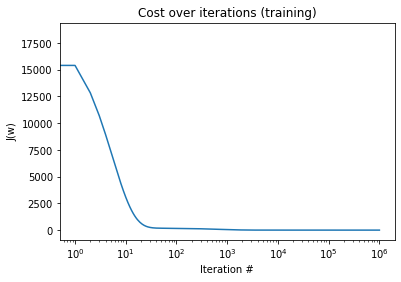

In [12]:
import matplotlib.pyplot as plt

# Label axes and title
plt.title('Cost over iterations (training)')
plt.ylabel('J(w)')
plt.xlabel('Iteration #')

# Set log scale
plt.xscale('log')

# Plot J(w) over iterations
plt.plot(np.arange(len(costs)), costs)

In [13]:
# Let's pick a car not in the dataset: The 1999 Honda Accord.
y_sample = np.array([[31]])
x_sample = np.array([[4, 109.6, 158, 2885, 16.3, 99, 3]])
y_pred = predict(x_sample, w, is_design_matrix=False).item()
print(f'The 19{int(x_sample[0,5])} Honda Accord is a {y_sample.item()} MPG sedan with a {int(x_sample[0,0])}-cyl engine (among other properties).\nThe model predicted this car to have {y_pred} MPG fuel economy.')

The 1999 Honda Accord is a 31 MPG sedan with a 4-cyl engine (among other properties).
The model predicted this car to have 36.28047653346874 MPG fuel economy.
